# Gráficos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

dfq1q2 = pd.read_csv('Dataset_Covid_CE_Laplace_Q1_Q2.csv').rename({'Unnamed: 0':'epsilon'}, axis='columns')
dfq3 = pd.read_csv('Dataset_Covid_CE_Laplace_Q3.csv')
df_municipios = pd.read_csv('ce-regions-format.csv')
dict_municipios = df_municipios.set_index('municipioCaso').to_dict()['regiaoPlanejamentoCaso']

In [2]:
dfq1q2

,epsilon,q1,q2
0,original,40.393428,266235.000000
1,0.1,40.393287,266237.094547
2,0.5,40.393271,266236.010014
3,1.0,40.393357,266235.544499
4,10,40.393424,266234.971497


In [3]:
dfq3

,municipioCaso,original,0.1,0.5,1.0,10
0,ABAIARA,617,617.869287,617.105723,617.340744,617.072388
1,ACARAPE,2910,2908.966792,2910.972237,2910.411286,2910.013270
2,ACARAU,6844,6851.633622,6844.203969,6844.413338,6843.940651
3,ACOPIARA,3069,3062.632672,3070.037867,3068.649119,3068.970033
4,AIUABA,391,400.212800,391.022288,391.182187,390.980589
...,...,...,...,...,...,...
179,URUBURETAMA,1500,1501.789520,1499.969501,1500.324550,1500.028119
180,URUOCA,1926,1919.446119,1927.362631,1926.371633,1926.059280
181,VARJOTA,2679,2675.502956,2678.857999,2679.701221,2678.960183
182,VARZEA ALEGRE,3245,3243.245094,3245.189542,3244.584554,3244.985388


## Q1

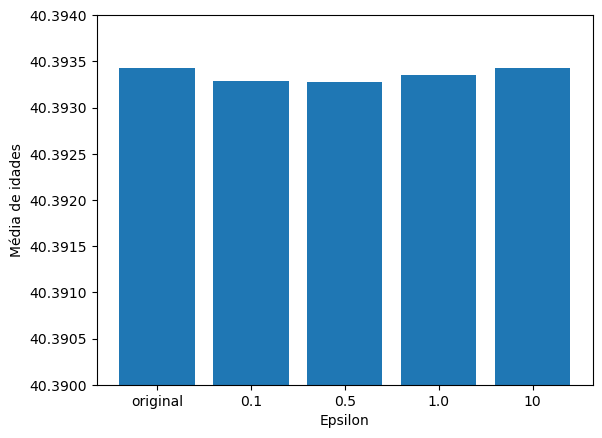

In [4]:
plt.bar(dfq1q2['epsilon'], dfq1q2['q1'])
plt.ylim(40.39, 40.394)
plt.xlabel('Epsilon')
plt.ylabel('Média de idades')
plt.show()

## Q2

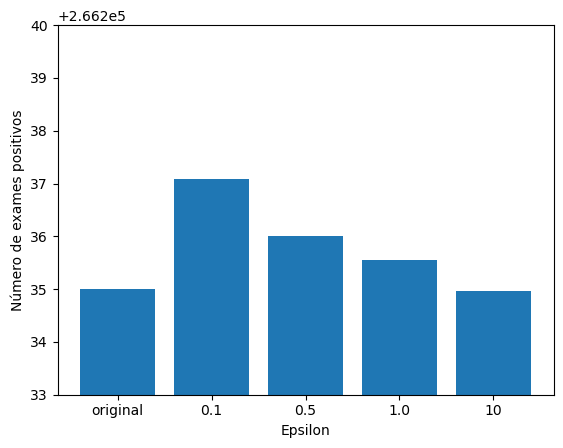

In [16]:
plt.bar(dfq1q2['epsilon'], dfq1q2['q2'])
plt.ylim(266233, 266240)
plt.xlabel('Epsilon')
plt.ylabel('Número de exames positivos')
plt.show()

## Q3

In [15]:
dfq3['regiaoPlanejamentoCaso'] = dfq3.apply(lambda x: dict_municipios[x['municipioCaso']], axis=1)
dfq3_sum = dfq3.groupby('regiaoPlanejamentoCaso').sum()
dfq3_sum

,original,0.1,0.5,1.0,10
regiaoPlanejamentoCaso,,,,,
CARIRI,134042,134096.286971,134047.984983,134046.928581,134041.582747
CENTRO SUL,54743,54748.202502,54743.979827,54741.080699,54742.984047
GRANDE FORTALEZA,334940,334955.822574,334940.150198,334938.229140,334939.930964
LITORAL LESTE,15532,15548.151096,15534.028745,15531.324561,15532.056430
LITORAL NORTE,45288,45296.530889,45286.468937,45287.723957,45288.210475
LITORAL OESTE / VALE DO CURU,20221,20218.211051,20215.841401,20220.961106,20221.118929
MACICO DE BATURITE,23629,23626.142629,23632.027935,23631.648420,23629.204916
SERRA DA IBIAPABA,33047,33044.030048,33049.001316,33047.081231,33046.882431
SERTAO CENTRAL,35619,35619.386994,35627.978302,35618.040136,35619.097577


In [7]:
def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % height,
                ha='center', va='bottom')

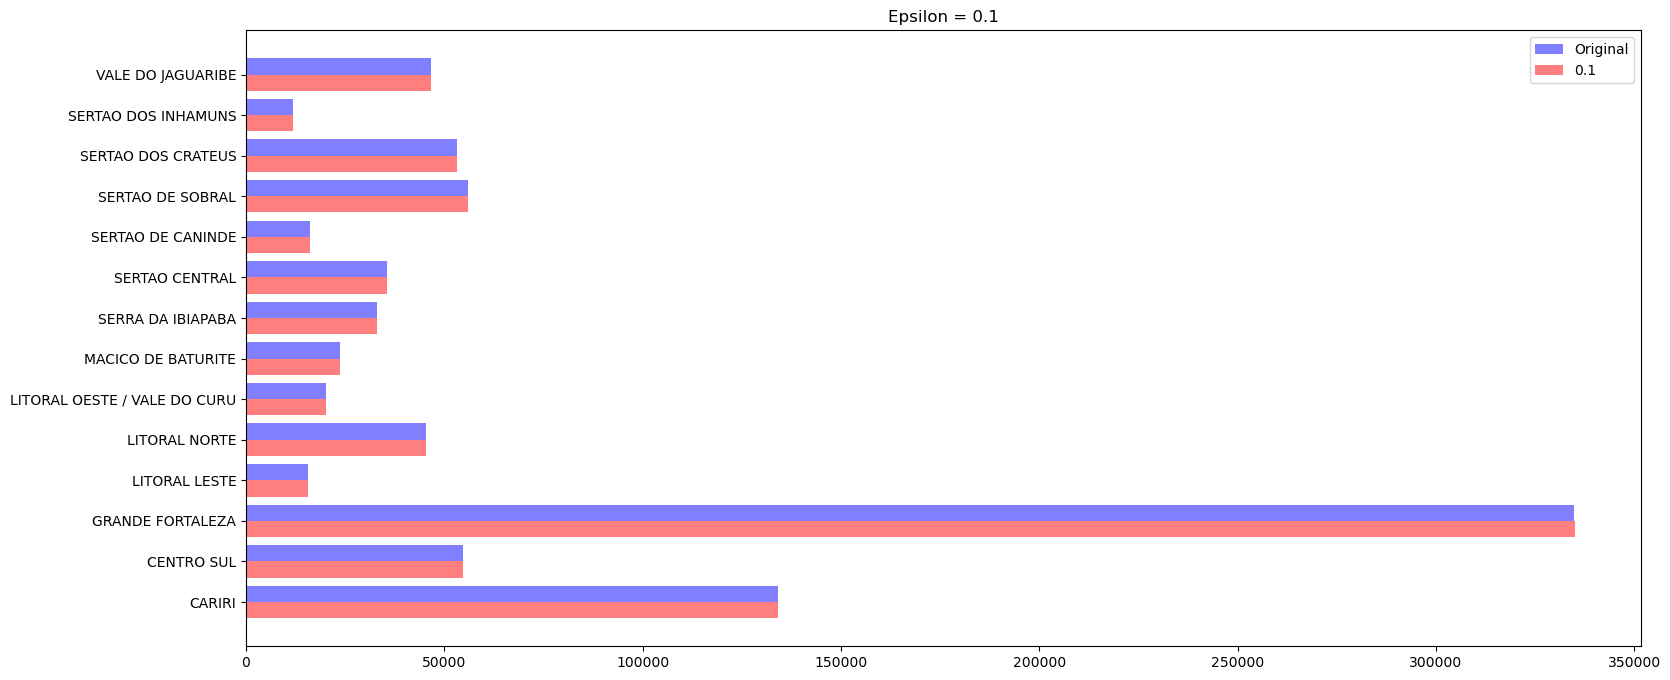

In [8]:
y_pos = np.arange(len(dfq3_sum.index))
height = 0.4

fig, ax1 = plt.subplots(figsize=(18, 8))
rects1 = ax1.barh(y_pos + height/2, dfq3_sum['original'], height=height, label='Original', color='blue', alpha=0.5)
rects2 = ax1.barh(y_pos - height/2, dfq3_sum['0.1'], height=height, label='0.1', color='red', alpha=0.5)

ax1.set_title('Epsilon = 0.1')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(dfq3_sum.index)
plt.legend()
plt.show()

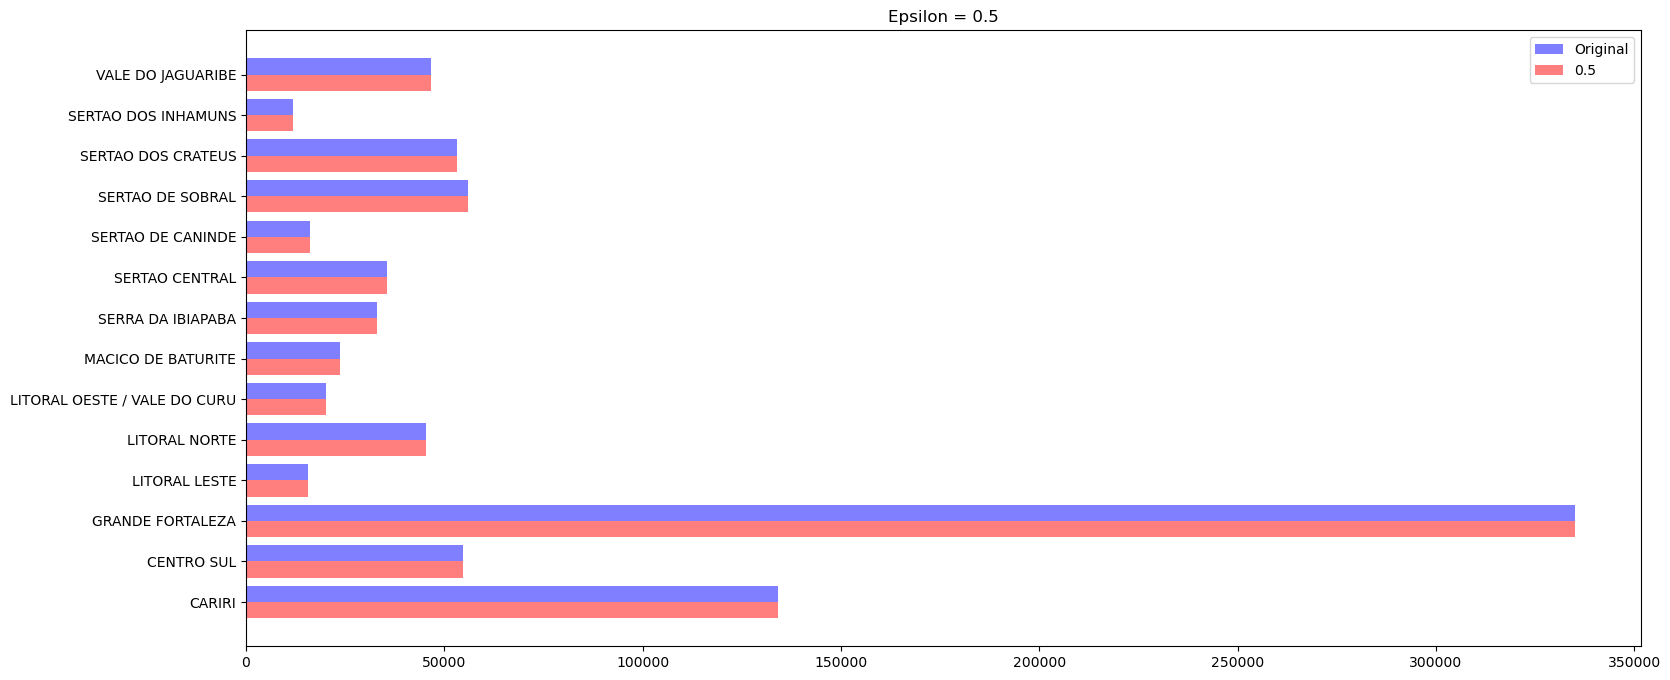

In [9]:
y_pos = np.arange(len(dfq3_sum.index))
height = 0.4

fig, ax1 = plt.subplots(figsize=(18, 8))
rects1 = ax1.barh(y_pos + height/2, dfq3_sum['original'], height=height, label='Original', color='blue', alpha=0.5)
rects2 = ax1.barh(y_pos - height/2, dfq3_sum['0.5'], height=height, label='0.5', color='red', alpha=0.5)

ax1.set_title('Epsilon = 0.5')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(dfq3_sum.index)
plt.legend()
plt.show()

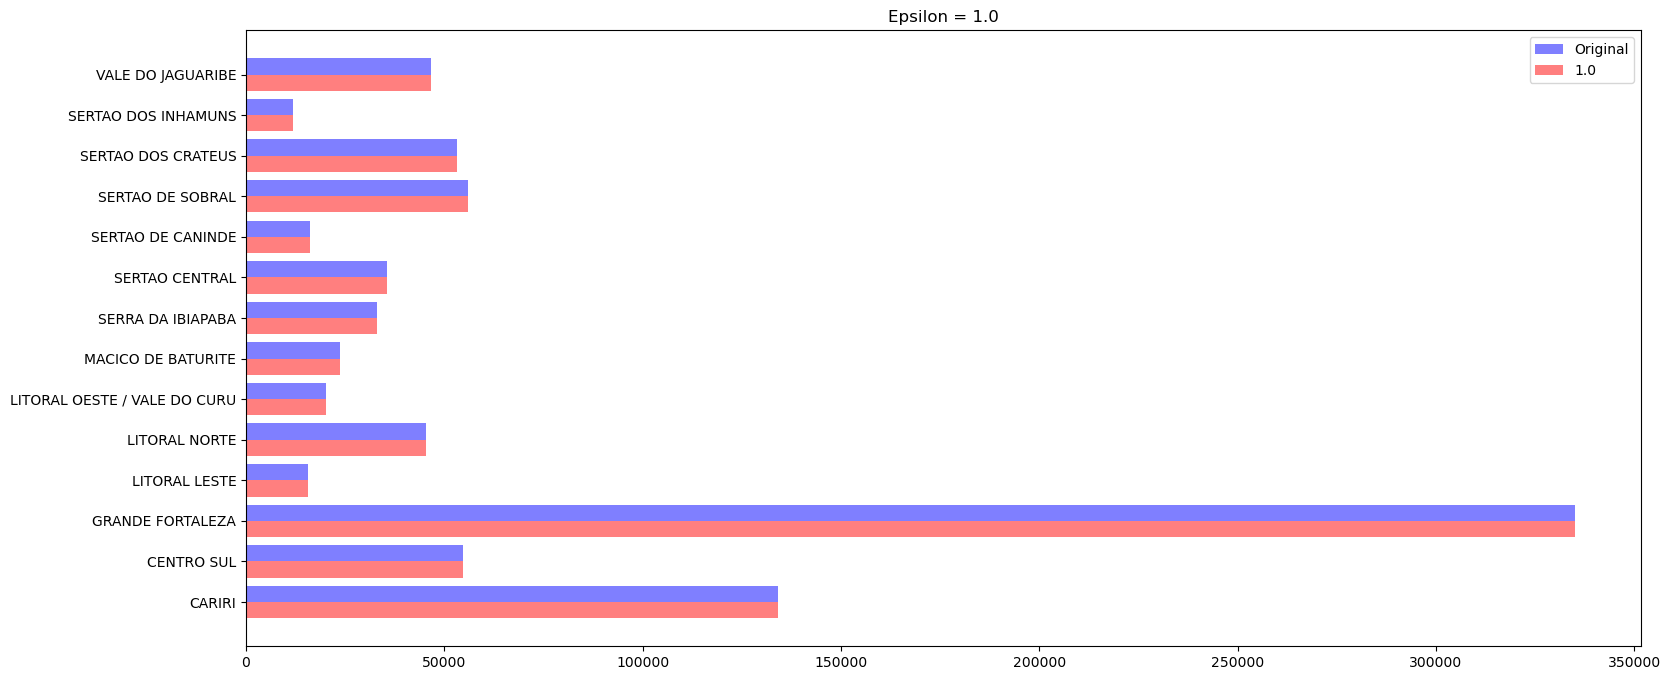

In [10]:
y_pos = np.arange(len(dfq3_sum.index))
height = 0.4

fig, ax1 = plt.subplots(figsize=(18, 8))
rects1 = ax1.barh(y_pos + height/2, dfq3_sum['original'], height=height, label='Original', color='blue', alpha=0.5)
rects2 = ax1.barh(y_pos - height/2, dfq3_sum['1.0'], height=height, label='1.0', color='red', alpha=0.5)

ax1.set_title('Epsilon = 1.0')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(dfq3_sum.index)
plt.legend()
plt.show()

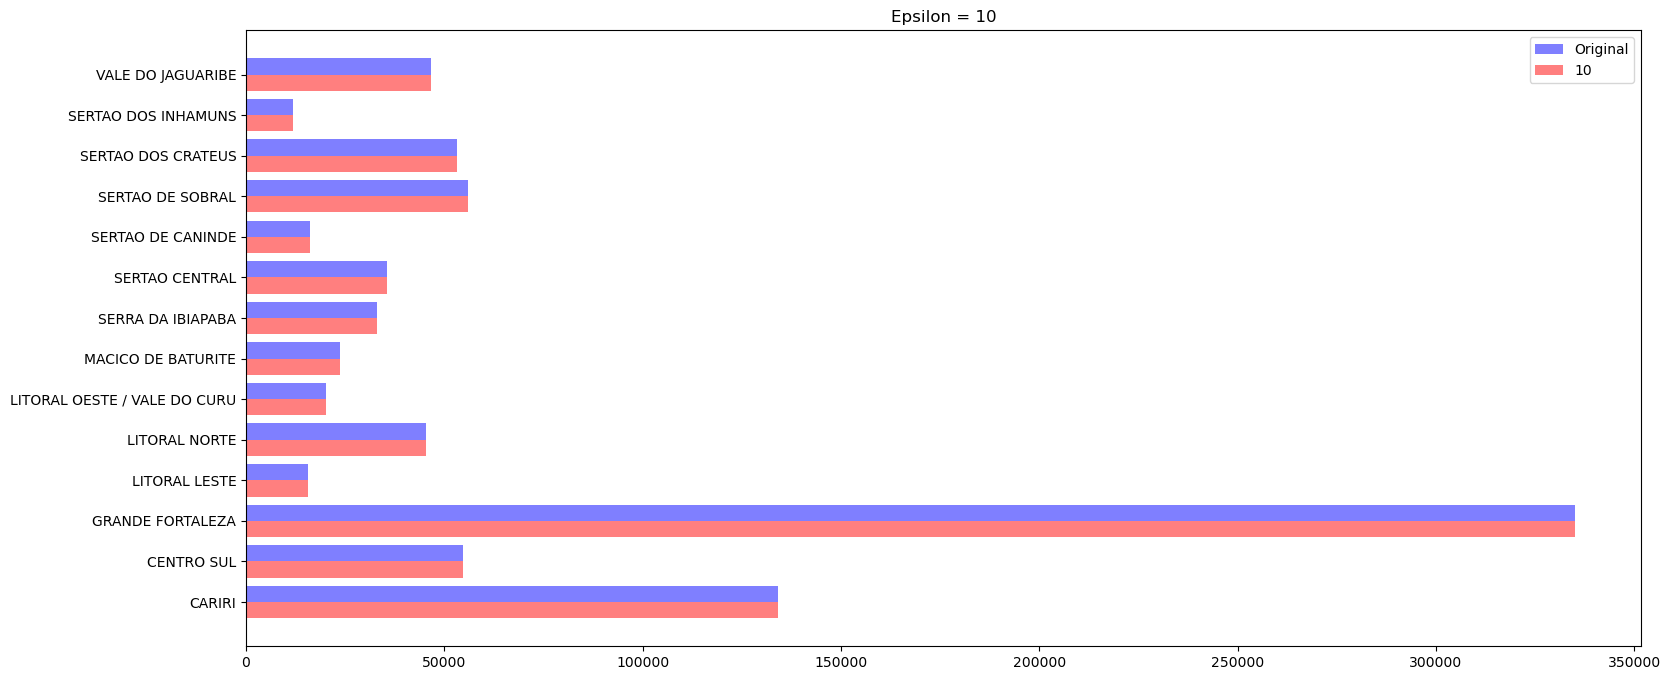

In [11]:
y_pos = np.arange(len(dfq3_sum.index))
height = 0.4

fig, ax1 = plt.subplots(figsize=(18, 8))
rects1 = ax1.barh(y_pos + height/2, dfq3_sum['original'], height=height, label='Original', color='blue', alpha=0.5)
rects2 = ax1.barh(y_pos - height/2, dfq3_sum['10'], height=height, label='10', color='red', alpha=0.5)

ax1.set_title('Epsilon = 10')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(dfq3_sum.index)
plt.legend()
plt.show()